In [3]:
import pandas as pd

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

# to save the audio files
import soundfile as sf

# import keras
# from keras.callbacks import ReduceLROnPlateau
# from keras.models import Sequential
# from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
# from keras.utils import np_utils, to_categorical
# from keras.callbacks import ModelCheckpoint

import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
# Paths for data.
Ravdess = "datasets/Ravdess/audio_speech_actors_01-24/"
Crema = "datasets/Crema/"
Tess = "datasets/Tess/"
Savee = "datasets/Savee/"

# Distribution of Audio Lengths

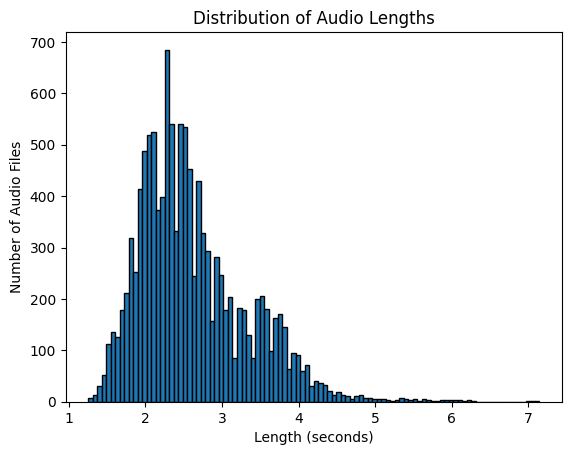

In [34]:
ravdess_directory_list = os.listdir(Ravdess)
crema_directory_list = os.listdir(Crema)
tess_directory_list = os.listdir(Tess)
savee_directory_list = os.listdir(Savee)

# Initialize a list to store the lengths of the audio files
audio_lengths = []

# Loop through each file and get the length
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        y, sr = librosa.load(Ravdess + dir + '/' + file)
        length = librosa.get_duration(y=y, sr=sr)
        audio_lengths.append(length)

# Loop through each file and get the length
for file in crema_directory_list:
    y, sr = librosa.load(Crema + file)
    length = librosa.get_duration(y=y, sr=sr)
    audio_lengths.append(length)

# Loop through each file and get the length
for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        y, sr = librosa.load(Tess + dir + '/' + file)
        length = librosa.get_duration(y=y, sr=sr)
        audio_lengths.append(length)

# Loop through each file and get the length
for file in savee_directory_list:
    y, sr = librosa.load(Savee + file)
    length = librosa.get_duration(y=y, sr=sr)
    audio_lengths.append(length)

# Plot the histogram
plt.hist(audio_lengths, bins=100, edgecolor='black')
plt.title('Distribution of Audio Lengths')
plt.xlabel('Length (seconds)')
plt.ylabel('Number of Audio Files')
plt.show()

# Finding Optimal Volume Values for Trimming

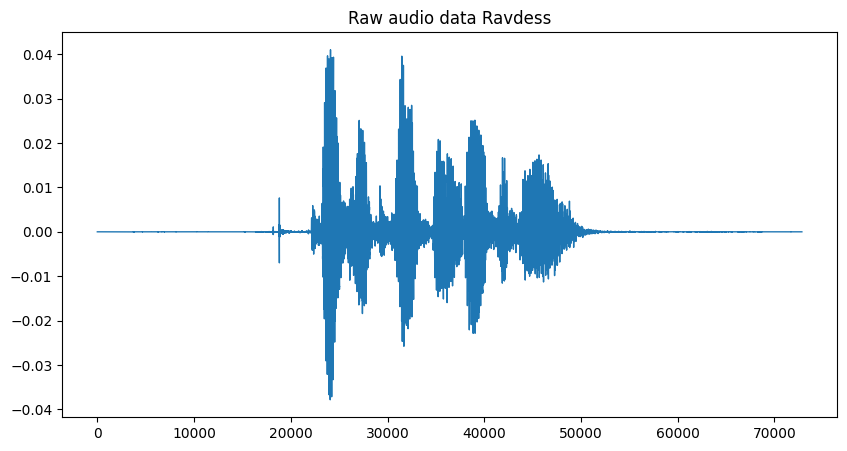

In [50]:
ravdess_actor_1 = os.listdir(Ravdess)[0]

file_1 = os.listdir(Ravdess + ravdess_actor_1)[0]

y, sr = librosa.load(Ravdess + ravdess_actor_1 + '/' + file_1)

pd.Series(y).plot(figsize=(10, 5), lw=1, title='Raw audio data Ravdess')
Audio(y, rate=sr)


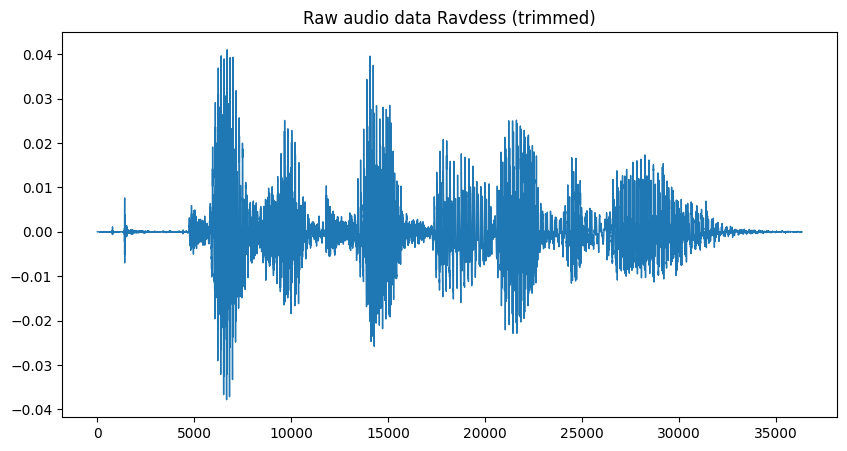

In [51]:
ravdess_actor_1 = os.listdir(Ravdess)[0]

file_1 = os.listdir(Ravdess + ravdess_actor_1)[0]

y, sr = librosa.load(Ravdess + ravdess_actor_1 + '/' + file_1)
y_trimmed, _ = librosa.effects.trim(y, top_db=50)

pd.Series(y_trimmed).plot(figsize=(10, 5), lw=1, title='Raw audio data Ravdess (trimmed)')
Audio(y_trimmed, rate=sr)

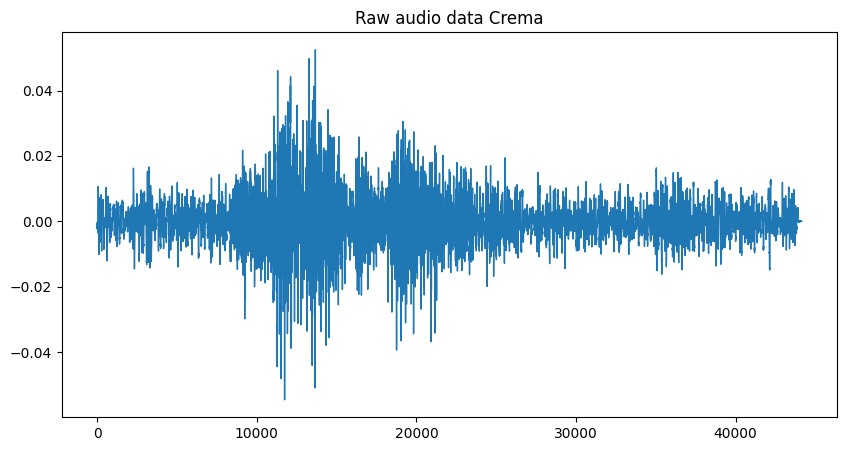

In [62]:
crema_file_1 = os.listdir(Crema)[10]

y, sr = librosa.load(Crema + crema_file_1)

pd.Series(y).plot(figsize=(10, 5), lw=1, title='Raw audio data Crema')
Audio(y, rate=sr)


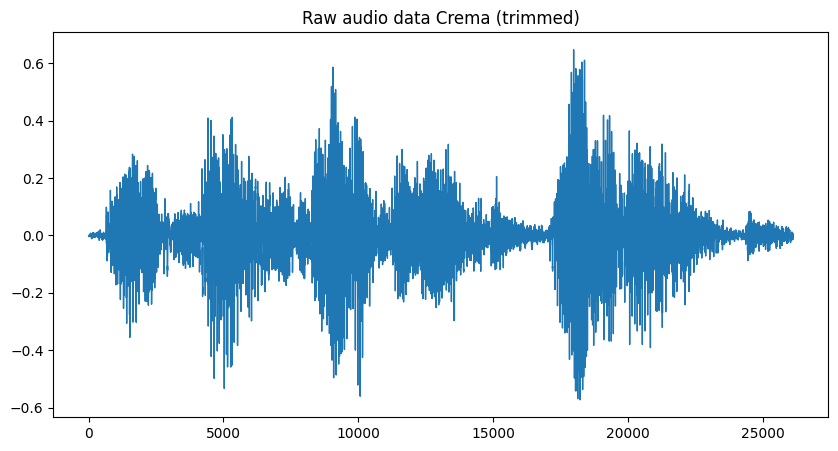

In [74]:
crema_file_1 = os.listdir(Crema)[15]

y, sr = librosa.load(Crema + crema_file_1)
y_trimmed, _ = librosa.effects.trim(y, top_db=25)

pd.Series(y_trimmed).plot(figsize=(10, 5), lw=1, title='Raw audio data Crema (trimmed)')
Audio(y_trimmed, rate=sr)


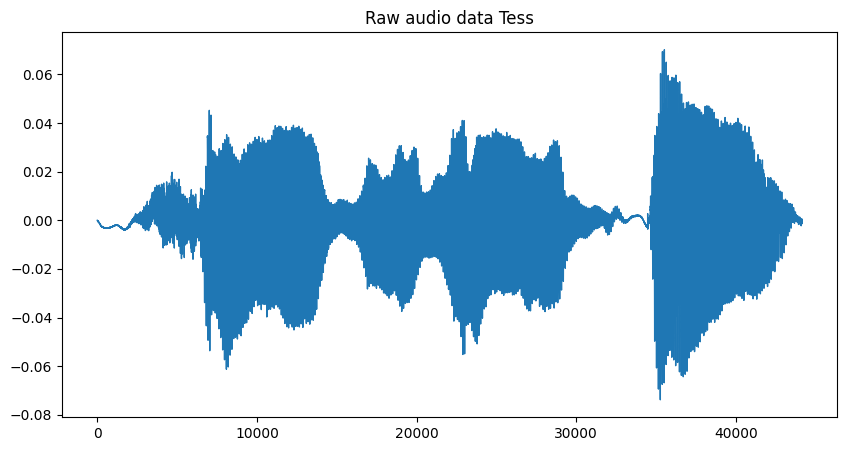

In [83]:
tess_directory_1 = os.listdir(Tess)[4]
audio_1 = os.listdir(Tess + tess_directory_1)[1]

y, sr = librosa.load(Tess + tess_directory_1 + '/' + audio_1)

pd.Series(y).plot(figsize=(10, 5), lw=1, title='Raw audio data Tess')
Audio(y, rate=sr)


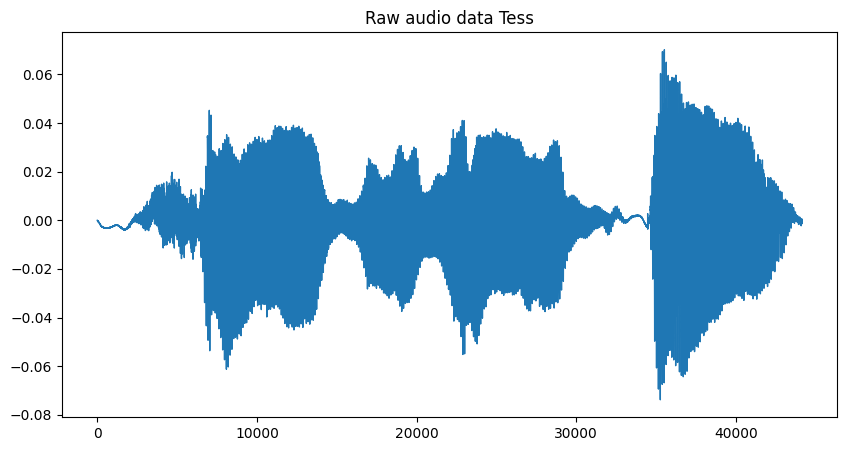

In [84]:
tess_directory_1 = os.listdir(Tess)[4]
audio_1 = os.listdir(Tess + tess_directory_1)[1]

y, sr = librosa.load(Tess + tess_directory_1 + '/' + audio_1)
y_trimmed, _ = librosa.effects.trim(y)

pd.Series(y_trimmed).plot(figsize=(10, 5), lw=1, title='Raw audio data Tess')
Audio(y_trimmed, rate=sr)


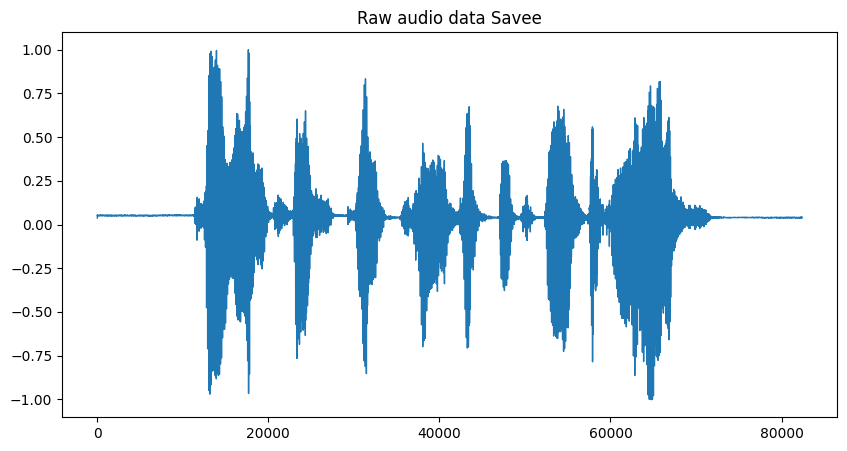

In [104]:
savee_audio_1 = os.listdir(Savee)[5]

y, sr = librosa.load(Savee + '/' + savee_audio_1)

pd.Series(y).plot(figsize=(10, 5), lw=1, title='Raw audio data Savee')
Audio(y, rate=sr)

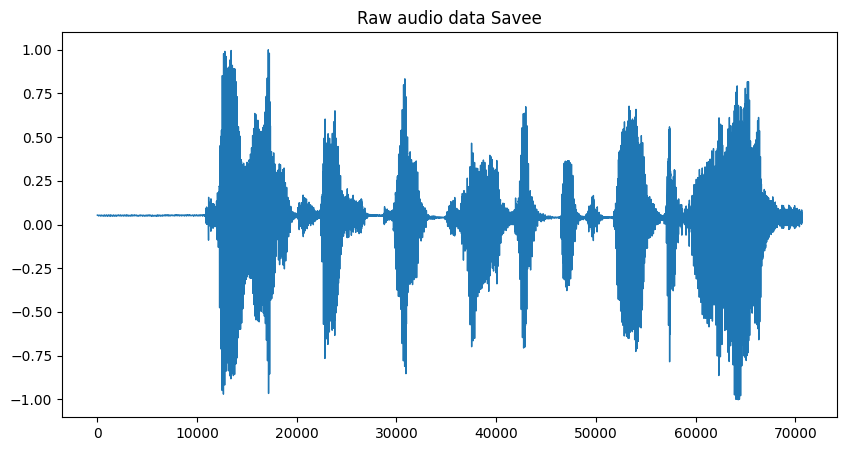

In [105]:
savee_audio_1 = os.listdir(Savee)[5]

y, sr = librosa.load(Savee + '/' + savee_audio_1)
y_trimmed, _ = librosa.effects.trim(y, top_db=20)

pd.Series(y_trimmed).plot(figsize=(10, 5), lw=1, title='Raw audio data Savee')
Audio(y_trimmed, rate=sr)

# Distribution of Audio Lengths (trimmed)

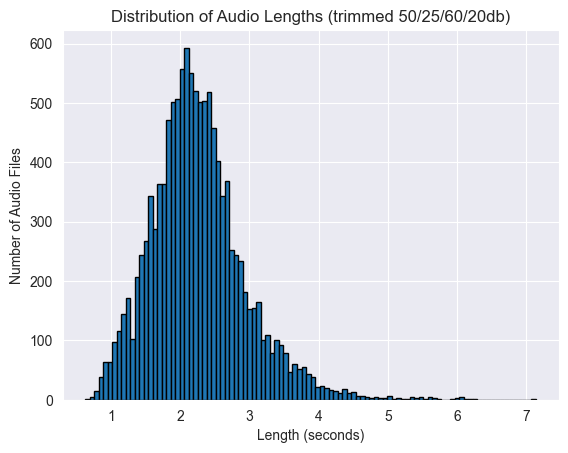

In [18]:
ravdess_directory_list = os.listdir(Ravdess)
crema_directory_list = os.listdir(Crema)
tess_directory_list = os.listdir(Tess)
savee_directory_list = os.listdir(Savee)

# Initialize a list to store the lengths of the audio files
audio_lengths = []
long_audios = []
short_audios = []

# Loop through each file and get the length
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        y, sr = librosa.load(Ravdess + dir + '/' + file)
        y_trimmed, _ = librosa.effects.trim(y, top_db=50)
        length = librosa.get_duration(y=y_trimmed, sr=sr)
        audio_lengths.append(length)
        if (length > 7):
            long_audios.append(Ravdess + dir + '/' + file)
        if (length <= 0.7):
            short_audios.append(Ravdess + dir + '/' + file)

# Loop through each file and get the length
for file in crema_directory_list:
    y, sr = librosa.load(Crema + file)
    y_trimmed, _ = librosa.effects.trim(y, top_db=25)
    length = librosa.get_duration(y=y_trimmed, sr=sr)
    audio_lengths.append(length)
    if (length > 7):
        long_audios.append(Crema + file)
    if (length <= 0.7):
        short_audios.append(Crema + file)

# Loop through each file and get the length
for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        y, sr = librosa.load(Tess + dir + '/' + file)
        y_trimmed, _ = librosa.effects.trim(y)
        length = librosa.get_duration(y=y_trimmed, sr=sr)
        audio_lengths.append(length)
        if (length > 7):
            long_audios.append(Tess + dir + '/' + file)
        if (length <= 0.7):
            short_audios.append(Tess + dir + '/' + file)

# Loop through each file and get the length
for file in savee_directory_list:
    y, sr = librosa.load(Savee + file)
    y_trimmed, _ = librosa.effects.trim(y, top_db=20)
    length = librosa.get_duration(y=y_trimmed, sr=sr)
    audio_lengths.append(length)
    if (length > 7):
        long_audios.append(Savee + file)
    if (length <= 0.7):
        short_audios.append(Savee + file)

# Plot the histogram
plt.hist(audio_lengths, bins=100, edgecolor='black')
plt.title('Distribution of Audio Lengths (trimmed 50/25/60/20db)')
plt.xlabel('Length (seconds)')
plt.ylabel('Number of Audio Files')
plt.show()

# Shortest audio samples

In [19]:
short_audios

['datasets/Crema/1013_IEO_FEA_HI.wav', 'datasets/Crema/1057_IEO_FEA_HI.wav']

In [27]:
y, sr = librosa.load(short_audios[0])
y_trimmed, _ = librosa.effects.trim(y, top_db=25)
librosa.get_duration(y=y_trimmed, sr=sr)

# pd.Series(y_trimmed).plot(figsize=(10, 5), lw=1,  title = 'Raw audio Crema (longest sample)')
# Audio(y_trimmed, rate=sr)

0.6501587301587302

In [28]:
y, sr = librosa.load(short_audios[1])
y_trimmed, _ = librosa.effects.trim(y, top_db=25)
length = librosa.get_duration(y=y_trimmed, sr=sr)

pd.Series(y_trimmed).plot(figsize=(10, 5), lw=1, title='Raw audio Crema (longest sample)')
Audio(y_trimmed, rate=sr)
length

0.626938775510204

# Longest audio sample

In [112]:
long_audios

['datasets/Savee/JE_sa14.wav']

7.138730158730159

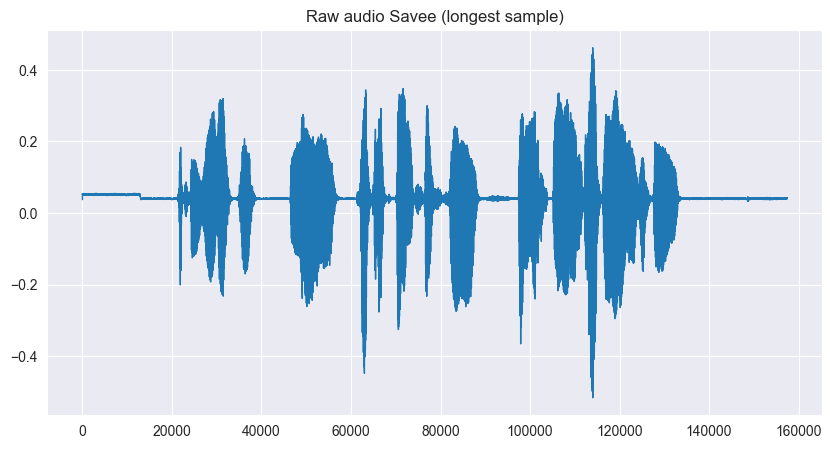

In [29]:
y, sr = librosa.load(long_audios[0])
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
length = librosa.get_duration(y=y_trimmed, sr=sr)

pd.Series(y_trimmed).plot(figsize=(10, 5), lw=1, title='Raw audio Savee (longest sample)')
Audio(y_trimmed, rate=sr)
length

# Experimenting with normalization

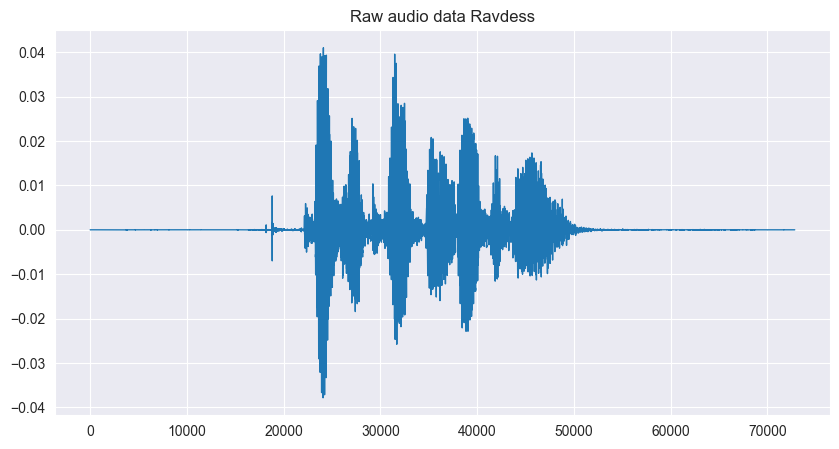

In [6]:
ravdess_actor_1 = os.listdir(Ravdess)[0]

file_1 = os.listdir(Ravdess + ravdess_actor_1)[0]

y, sr = librosa.load(Ravdess + ravdess_actor_1 + '/' + file_1)

pd.Series(y).plot(figsize=(10, 5), lw=1, title='Raw audio data Ravdess')
Audio(y, rate=sr)

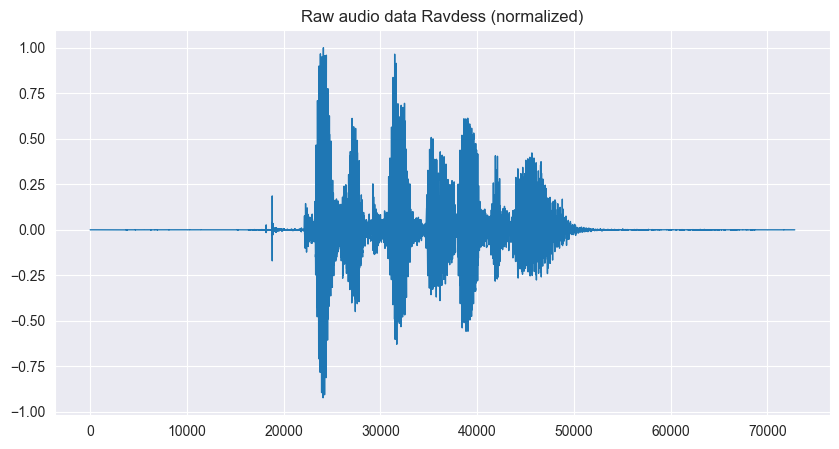

In [7]:
ravdess_actor_1 = os.listdir(Ravdess)[0]

file_1 = os.listdir(Ravdess + ravdess_actor_1)[0]

y, sr = librosa.load(Ravdess + ravdess_actor_1 + '/' + file_1)
normalized_audio = librosa.util.normalize(y)

pd.Series(normalized_audio).plot(figsize=(10, 5), lw=1, title='Raw audio data Ravdess (normalized)')
Audio(normalized_audio, rate=sr)

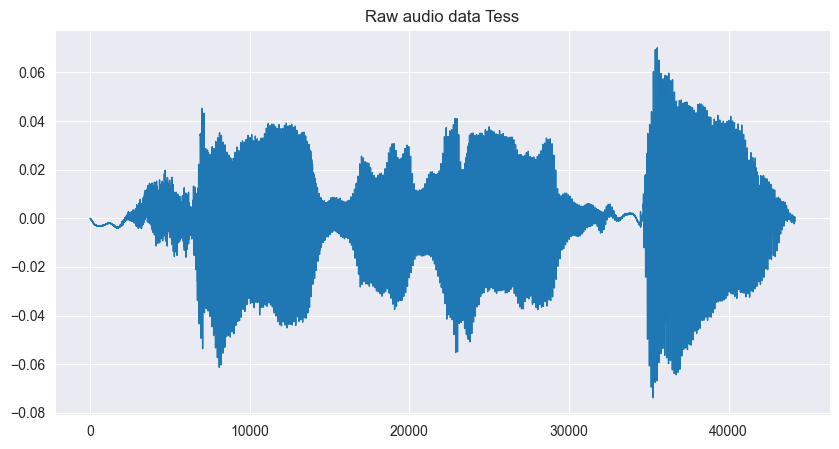

In [8]:
tess_directory_1 = os.listdir(Tess)[4]
audio_1 = os.listdir(Tess + tess_directory_1)[1]

y, sr = librosa.load(Tess + tess_directory_1 + '/' + audio_1)

pd.Series(y).plot(figsize=(10, 5), lw=1, title='Raw audio data Tess')
Audio(y, rate=sr)


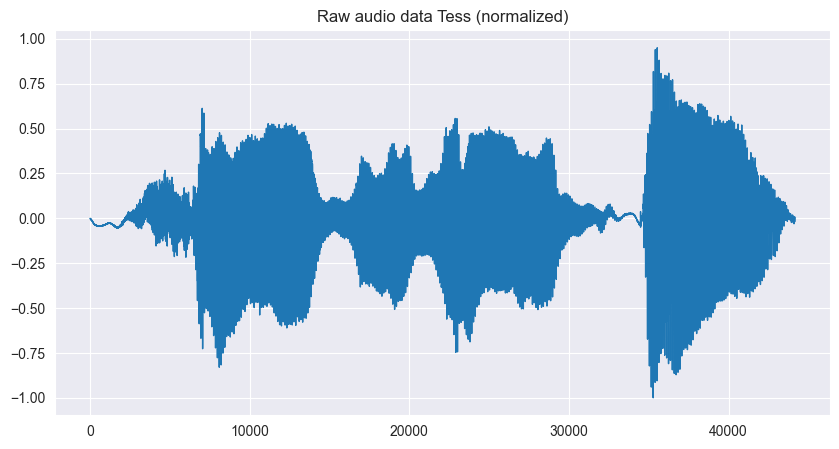

In [9]:
tess_directory_1 = os.listdir(Tess)[4]
audio_1 = os.listdir(Tess + tess_directory_1)[1]

y, sr = librosa.load(Tess + tess_directory_1 + '/' + audio_1)
normalized_audio = librosa.util.normalize(y)

pd.Series(normalized_audio).plot(figsize=(10, 5), lw=1, title='Raw audio data Tess (normalized)')
Audio(normalized_audio, rate=sr)


# Trimming and combining

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)
crema_directory_list = os.listdir(Crema)
tess_directory_list = os.listdir(Tess)
savee_directory_list = os.listdir(Savee)

segment_length = 0.6

## Ravdess

In [33]:
actor_counter = 0

# Loop through each file and get the length
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    actor_samples_counter = 0

    for file in actor:

        # dir = ravdess_directory_list[0]
        # file = os.listdir(Ravdess + dir)[0]

        part = file.split('.')[0]
        part = part.split('-')
        if int(part[2]) == 1 or int(part[2]) == 2:
            path = "datasets/combined/neutral+calm/"
        elif int(part[2]) == 3:
            path = "datasets/combined/happy/"
        elif int(part[2]) == 4:
            path = "datasets/combined/sad/"
        elif int(part[2]) == 5:
            path = "datasets/combined/angry/"
        elif int(part[2]) == 6:
            path = "datasets/combined/fear/"
        elif int(part[2]) == 7:
            path = "datasets/combined/disgust/"
        elif int(part[2]) == 8:
            path = "datasets/combined/surprised/"
        else:
            path = "datasets/combined/"

        y, sr = librosa.load(Ravdess + dir + '/' + file)
        y_trimmed, _ = librosa.effects.trim(y, top_db=50)
        normalized_audio = librosa.util.normalize(y_trimmed)

        # Segment length in samples
        segment_length_samples = int(segment_length * sr)

        # Number of segments
        num_segments = len(normalized_audio) // segment_length_samples

        for i in range(num_segments):
            start_sample = i * segment_length_samples
            end_sample = start_sample + segment_length_samples
            segment = normalized_audio[start_sample:end_sample]
            output_file_path = os.path.join(path, f'ravdess_{actor_counter}_{actor_samples_counter}_{i}.wav')
            sf.write(output_file_path, segment, sr)

        actor_samples_counter += 1
    actor_counter += 1


## Crema

In [34]:
file_counter = 0

for file in crema_directory_list:
    part = file.split('_')
    if part[2] == 'SAD':
        path = "datasets/combined/sad/"
    elif part[2] == 'ANG':
        path = "datasets/combined/angry/"
    elif part[2] == 'DIS':
        path = "datasets/combined/disgust/"
    elif part[2] == 'FEA':
        path = "datasets/combined/fear/"
    elif part[2] == 'HAP':
        path = "datasets/combined/happy/"
    elif part[2] == 'NEU':
        path = "datasets/combined/neutral+calm/"
    else:
        path = "datasets/combined/"

    y, sr = librosa.load(Crema + file)
    y_trimmed, _ = librosa.effects.trim(y, top_db=25)
    normalized_audio = librosa.util.normalize(y_trimmed)

    # Segment length in samples
    segment_length_samples = int(segment_length * sr)

    # Number of segments
    num_segments = len(normalized_audio) // segment_length_samples

    for i in range(num_segments):
        start_sample = i * segment_length_samples
        end_sample = start_sample + segment_length_samples
        segment = normalized_audio[start_sample:end_sample]
        output_file_path = os.path.join(path, f'crema_{file_counter}_{i}.wav')
        sf.write(output_file_path, segment, sr)

    file_counter += 1


## Tess

In [36]:
# tess
folder_counter = 0

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    file_counter = 0
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]

        if part == "angry":
            path = "datasets/combined/angry/"
        elif part == "disgust":
            path = "datasets/combined/disgust/"
        elif part == "fear":
            path = "datasets/combined/fear/"
        elif part == "happy":
            path = "datasets/combined/happy/"
        elif part == "neutral":
            path = "datasets/combined/neutral+calm/"
        elif part == 'ps':
            path = "datasets/combined/surprised/"
        elif part == 'sad':
            path = "datasets/combined/sad/"
        else:
            path = "datasets/combined/"

        y, sr = librosa.load(Tess + dir + '/' + file)
        y_trimmed, _ = librosa.effects.trim(y)
        normalized_audio = librosa.util.normalize(y_trimmed)

        # Segment length in samples
        segment_length_samples = int(segment_length * sr)

        # Number of segments
        num_segments = len(normalized_audio) // segment_length_samples

        for i in range(num_segments):
            start_sample = i * segment_length_samples
            end_sample = start_sample + segment_length_samples
            segment = normalized_audio[start_sample:end_sample]
            output_file_path = os.path.join(path, f'tess_{folder_counter}_{file_counter}_{i}.wav')
            sf.write(output_file_path, segment, sr)

        file_counter += 1
    folder_counter += 1

## Savee

In [37]:
# savee
file_counter = 0

for file in savee_directory_list:
    part = file.split('_')[1]
    ele = part[:-6]
    if ele == 'a':
        path = "datasets/combined/angry/"
    elif ele == 'd':
        path = "datasets/combined/disgust/"
    elif ele == 'f':
        path = "datasets/combined/fear/"
    elif ele == 'h':
        path = "datasets/combined/happy/"
    elif ele == 'n':
        path = "datasets/combined/neutral+calm/"
    elif ele == 'sa':
        path = "datasets/combined/sad/"
    elif ele == 'su':
        path = "datasets/combined/surprised/"
    else:
        path = "datasets/combined/"

    y, sr = librosa.load(Savee + file)
    y_trimmed, _ = librosa.effects.trim(y, top_db=20)
    normalized_audio = librosa.util.normalize(y_trimmed)

    # Segment length in samples
    segment_length_samples = int(segment_length * sr)

    # Number of segments
    num_segments = len(normalized_audio) // segment_length_samples

    for i in range(num_segments):
        start_sample = i * segment_length_samples
        end_sample = start_sample + segment_length_samples
        segment = normalized_audio[start_sample:end_sample]
        output_file_path = os.path.join(path, f'savee_{file_counter}_{i}.wav')
        sf.write(output_file_path, segment, sr)

    file_counter += 1


# Data Augmentation

In [41]:
import librosa
import numpy as np
import random

# Individual augmentation functions
def pitch_shift(audio, sampling_rate, n_steps):
    return librosa.effects.pitch_shift(audio, sr=sampling_rate, n_steps=n_steps)

def add_noise(audio, noise_factor):
    noise_amp = noise_factor*np.random.uniform()*np.amax(audio)
    audio = audio + noise_amp*np.random.normal(size=audio.shape[0])
    return audio

def frequency_masking(audio, sr, freq_mask_param=15):
    spectrogram = librosa.stft(audio)
    spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram))
    
    freq_mask = np.random.randint(0, spectrogram_db.shape[0] - freq_mask_param)
    spectrogram_db[freq_mask:freq_mask + freq_mask_param, :] = 0
    
    masked_audio = librosa.istft(librosa.db_to_amplitude(spectrogram_db))
    return masked_audio

def time_masking(audio, sr, time_mask_param=30):
    spectrogram = librosa.stft(audio)
    spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram))
    
    time_mask = np.random.randint(0, spectrogram_db.shape[1] - time_mask_param)
    spectrogram_db[:, time_mask:time_mask + time_mask_param] = 0
    
    masked_audio = librosa.istft(librosa.db_to_amplitude(spectrogram_db))
    return masked_audio

# Combination augmentation function
def combine_augmentations(audio, sr):
    if random.random() < 0.5:
        audio = pitch_shift(audio, sr, random.randint(-2, 2))
    if random.random() < 0.5:
        audio = add_noise(audio, 0.035)
    if random.random() < 0.5:
        audio = frequency_masking(audio, sr)
    if random.random() < 0.5:
        audio = time_masking(audio, sr)
    return audio


In [56]:
path = 'datasets/combined/surprised'
directory_list = os.listdir(path)
file = directory_list[0]

for file in directory_list:
    y, sr = librosa.load(path + "/" + file)
    
    # Apply individual augmentations
    pitch_shifted_audio = pitch_shift(y, sr, 1)
    noisy_audio = add_noise(y, 0.035)
    # freq_masked_audio = frequency_masking(y, sr)
    # time_masked_audio = time_masking(y, sr)
    
    # Apply combination augmentations
    # combined_augmented_audio = combine_augmentations(y, sr)
    
    sf.write(os.path.join(path, f'shifted_{file}'), pitch_shifted_audio, sr)
    sf.write(os.path.join(path, f'noisy_{file}'), noisy_audio, sr)
    
    # pd.Series(pitch_shifted_audio).plot(figsize=(10, 5), lw=1, title='Raw audio data Tess (normalized)')
    # librosa.get_duration(y=pitch_shifted_audio, sr=sr)
    # Audio(pitch_shifted_audio, rate=sr)

## Feature extraction

In [3]:
import librosa.feature

def extract_zcr(audio):
    zcr = librosa.feature.zero_crossing_rate(y=audio)
    zcr_mean = np.mean(zcr.T, axis=0)
    # print("extract_zcr", zcr.shape, zcr_mean.shape)
    return zcr_mean

def extract_chroma(audio, sr):
    chroma = librosa.feature.chroma_stft(S=audio, sr=sr)
    chroma_mean = np.mean(chroma.T, axis=0)
    # print("extract_chroma", chroma.shape, chroma_mean.shape)
    return chroma_mean

def extract_mfccs(audio, sr):
    mfccs = librosa.feature.mfcc(y=audio, sr=sr)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    # print("extract_mfccs", mfccs.shape, mfccs_mean.shape)
    return mfccs_mean

def extract_spectral_contrast(audio, sr):
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
    spectral_contrast_mean = np.mean(spectral_contrast.T, axis=0)
    # print("extract_spectral_contrast", spectral_contrast.shape, spectral_contrast_mean.shape)
    return spectral_contrast_mean

def extract_spectral_rolloff(audio, sr):
    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
    spectral_rolloff_mean = np.mean(spectral_rolloff.T, axis=0)
    # print("extract_spectral_rolloff", spectral_rolloff.shape, spectral_rolloff_mean.shape)
    return spectral_rolloff_mean

def extract_rmse(audio):
    rmse = librosa.feature.rms(y=audio)
    rmse_mean = np.mean(rmse.T, axis=0)
    # print("extract_rmse", rmse.shape, rmse_mean.shape)
    return rmse_mean

def extract_mel_spectrogram(audio, sr):
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
    mel_spectrogram_mean = np.mean(mel_spectrogram.T, axis=0)
    # print("extract_mel_spectrogram", mel_spectrogram.shape, mel_spectrogram_mean.shape)
    return mel_spectrogram_mean

def extract_features(data, sample_rate):
    result = np.array([])
    
    # ZCR
    zcr = extract_zcr(data)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = extract_chroma(stft, sample_rate)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = extract_mfccs(data, sample_rate)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Spectral_contrast
    spectral_contrast = extract_spectral_contrast(data, sample_rate)
    result = np.hstack((result, spectral_contrast)) # stacking horizontally

    # Spectral_rolloff
    spectral_rolloff = extract_spectral_rolloff(data, sample_rate)
    result = np.hstack((result, spectral_rolloff)) # stacking horizontally

    # RMS
    rms = extract_rmse(data)
    result = np.hstack((result, rms)) # stacking horizontally

    # Mel_spectrogram
    mel_spectrogram = extract_mel_spectrogram(data, sample_rate)
    result = np.hstack((result, mel_spectrogram)) # stacking horizontally
    
    return result

def get_features(path):
    data, sample_rate = librosa.load(path)
    
    features = extract_features(data, sample_rate)
    result = np.array(features)
    
    return result


In [24]:
features = get_features("datasets/combined/angry/crema_0_0.wav")
features.shape

extract_zcr (1, 26) (1,)
extract_chroma (12, 26) (12,)
extract_mfccs (20, 26) (20,)
extract_spectral_contrast (7, 26) (7,)
extract_spectral_rolloff (1, 26) (1,)
extract_rmse (1, 26) (1,)
extract_mel_spectrogram (128, 26) (128,)


(170,)

In [7]:
import os
import numpy as np
import pandas as pd

path = "datasets/combined"
directory_list = os.listdir(path)
X = []
angry_labels = []
disgust_labels = []
fear_labels = []
happy_labels = []
neutral_labels = []
sad_labels = []
surprised_labels = []

for emotion in directory_list:
    angry_label = 0
    disgust_label = 0
    fear_label = 0
    happy_label = 0
    neutral_label = 0
    sad_label = 0
    surprised_label = 0
    match emotion:
        case "angry":
            angry_label = 1
        case "disgust":
            disgust_label = 1
        case "fear":
            fear_label = 1
        case "happy":
            happy_label = 1
        case "neutral+calm":
            neutral_label = 1
        case "sad":
            sad_label = 1
        case "surprised":
            surprised_label = 1
        
    samples = os.listdir(path + "/" + emotion)
    for sample in samples:
        features = get_features(path + "/" + emotion + "/" + sample)
        X.append(features)
        angry_labels.append(angry_label)
        disgust_labels.append(disgust_label)
        fear_labels.append(fear_label)
        happy_labels.append(happy_label)
        neutral_labels.append(neutral_label)
        sad_labels.append(sad_label)
        surprised_labels.append(surprised_label)
    
Features = pd.DataFrame(X)
Features['angry'] = angry_labels
Features['disgust'] = disgust_labels
Features['fear'] = fear_labels
Features['happy'] = happy_labels
Features['neutral'] = neutral_labels
Features['sad'] = sad_labels
Features['surprised'] = surprised_labels
Features.to_csv('datasets/dataset.csv', index=False)
Features.head()

C:\Users\semem\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


,0,1,2,3,4,5,6,7,8,9,...,167,168,169,angry,disgust,fear,happy,neutral,sad,surprised
0,0.087571,0.562773,0.518651,0.655225,0.707285,0.727889,0.448072,0.416224,0.407370,0.469570,...,0.000028,0.000027,0.000027,1,0,0,0,0,0,0
1,0.124568,0.457904,0.494245,0.595628,0.611942,0.353614,0.321154,0.424224,0.517753,0.752975,...,0.000003,0.000003,0.000003,1,0,0,0,0,0,0
2,0.180251,0.410289,0.499764,0.502243,0.554269,0.463229,0.482461,0.552123,0.663478,0.645860,...,0.000011,0.000010,0.000010,1,0,0,0,0,0,0
3,0.084322,0.366516,0.315910,0.325588,0.493562,0.646365,0.616358,0.526592,0.493724,0.551897,...,0.000014,0.000014,0.000014,1,0,0,0,0,0,0
4,0.087384,0.376576,0.329216,0.332739,0.547763,0.756527,0.571407,0.379520,0.367596,0.464656,...,0.000050,0.000049,0.000049,1,0,0,0,0,0,0


In [38]:
Features.shape

(43830, 171)